In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
df=pd.read_csv(r"C:\Users\Smruti\Desktop\devops\insomnia\windspeed.csv")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   Wind Speed (m/s)               50530 non-null  float64
 2   LV ActivePower (kW)            50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
 5   Unnamed: 5                     0 non-null      float64
 6   Unnamed: 6                     0 non-null      float64
 7   Unnamed: 7                     50530 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.1+ MB


In [39]:
df.drop(columns=df[['Date/Time','Theoretical_Power_Curve (KWh)']],inplace=True)
y=df['LV ActivePower (kW)']
#df.drop(columns=['LV ActivePower (kW)'],axis=1,inplace=True)

### Standardization

In [43]:
df.head(15)

,Wind Speed (m/s),LV ActivePower (kW),Wind Direction (°),Unnamed: 5,Unnamed: 6,Unnamed: 7
0,5.31,380.047791,259.994904,NaN,NaN,5.31
1,5.67,453.769196,268.641113,NaN,NaN,5.67
2,5.22,306.376587,272.564789,NaN,NaN,5.22
3,5.66,419.645904,271.258087,NaN,NaN,5.66
4,5.58,380.650696,265.674286,NaN,NaN,5.58
5,5.60,402.391998,264.578613,NaN,NaN,5.60
6,5.79,447.605713,266.163605,NaN,NaN,5.79
7,5.31,387.242188,257.949493,NaN,NaN,5.31
8,5.58,463.651215,253.480698,NaN,NaN,5.58
9,5.52,439.725708,258.723785,NaN,NaN,5.52


In [44]:
df['LV ActivePower (kW)']=(df['LV ActivePower (kW)']-df['LV ActivePower (kW)'].mean())/(df['LV ActivePower (kW)'].std())
df['Wind Speed (m/s)']=(df['Wind Speed (m/s)']-df['Wind Speed (m/s)'].mean())/(df['Wind Speed (m/s)'].std())

In [45]:
y_train=y[:42283]
y_test=y[42283:]
X_train=df.iloc[:42283]
X_test=df.iloc[42283:]

In [6]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [7]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [8]:
rf=RandomForestRegressor()
params_rf={
"n_estimators"     : [50, 100, 150, 200, 500, 800,1000,1500] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15,20,25]}

In [9]:
random_search=RandomizedSearchCV(rf,param_distributions=params_rf,n_iter=10,n_jobs=-1,cv=5,verbose=3)

In [10]:


# Assuming X_train, X_test, y_train, y_test are already defined

results = {
    "Model": [],
    "R2": [],
    "RMSE": [],
    "MAE": []
}

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize models
rf = RandomForestRegressor()
dt = DecisionTreeRegressor(random_state=42)
sm = SVR(gamma='auto',C=100,epsilon=0.4)

# Fit the models and make predictions
model_rf = rf.fit(X_train_imputed, y_train)
y_rf = model_rf.predict(X_test_imputed)

model_dt = dt.fit(X_train_imputed, y_train)
y_dt = model_dt.predict(X_test_imputed)

model_sm = sm.fit(X_train_imputed, y_train)
y_sm = model_sm.predict(X_test_imputed)

# Evaluation metrics calculation
metrics = {
    "RandomForest": (y_rf, "Random Forest"),
    "DecisionTree": (y_dt, "Decision Tree"),
    "SVR": (y_sm, "Support Vector Regressor")
}

for name, (y_pred, model_name) in metrics.items():
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    results["Model"].append(model_name)
    results["R2"].append(r2)
    results["RMSE"].append(rmse)
    results["MAE"].append(mae)
    print(f'{model_name}:')
    print(f'  R2: {r2:.4f}')
    print(f'  RMSE: {rmse:.4f}')
    print(f'  MAE: {mae:.4f}\n')


C:\Users\Smruti\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['Unnamed: 5' 'Unnamed: 6']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\Smruti\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['Unnamed: 5' 'Unnamed: 6']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Random Forest:
  R2: 1.0000
  RMSE: 0.0894
  MAE: 0.0491

Decision Tree:
  R2: 1.0000
  RMSE: 0.1571
  MAE: 0.0802

Support Vector Regressor:
  R2: 0.8948
  RMSE: 445.4300
  MAE: 173.4817



In [11]:
from datetime import datetime

start_time = timer(None) 
random_search.fit(X_train_imputed,y_train)
timer(start_time) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits

 Time taken: 0 hours 14 minutes and 56.12 seconds.


In [12]:
random_search.best_estimator_

RandomForestRegressor(max_depth=20, n_estimators=150)

In [13]:
x=rf.fit(X_train_imputed,y_train)
y1=x.predict(X_test_imputed)
r2_score(y_test,y1)

0.9999999957624205

In [14]:
sv=SVR(gamma='auto',C=100,epsilon=0.4)
x=rf.fit(X_train_imputed,y_train)
y1=x.predict(X_test_imputed)
r2_score(y_test,y1)

0.9999999958091156

In [15]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_imputed, y_train)
y_pred = dt.predict(X_test_imputed)
r2_score(y_test,y_pred)

0.9999999869182314

In [16]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier



digit = load_digits()
X, y = digit.data, digit.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


base_classifier = DecisionTreeClassifier()

# Number of base models (iterations)
n_estimators = 10


bagging_classifier = BaggingClassifier(base_estimator=base_classifier, n_estimators=n_estimators)


bagging_classifier.fit(X_train, y_train)


y_pred = bagging_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


C:\Users\Smruti\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.9444444444444444


In [17]:
sv=SVR(gamma='auto',C=100,epsilon=0.4)
x=rf.fit(X_train,y_train)
y1=x.predict(X_test)
r2_score(y_test,y1)

0.833512851222292

In [18]:
x=rf.fit(X_train,y_train)
y1=x.predict(X_test)
r2_score(y_test,y1)

0.8316381100597237

In [19]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
r2_score(y_test,y_pred)

0.6810343708140256

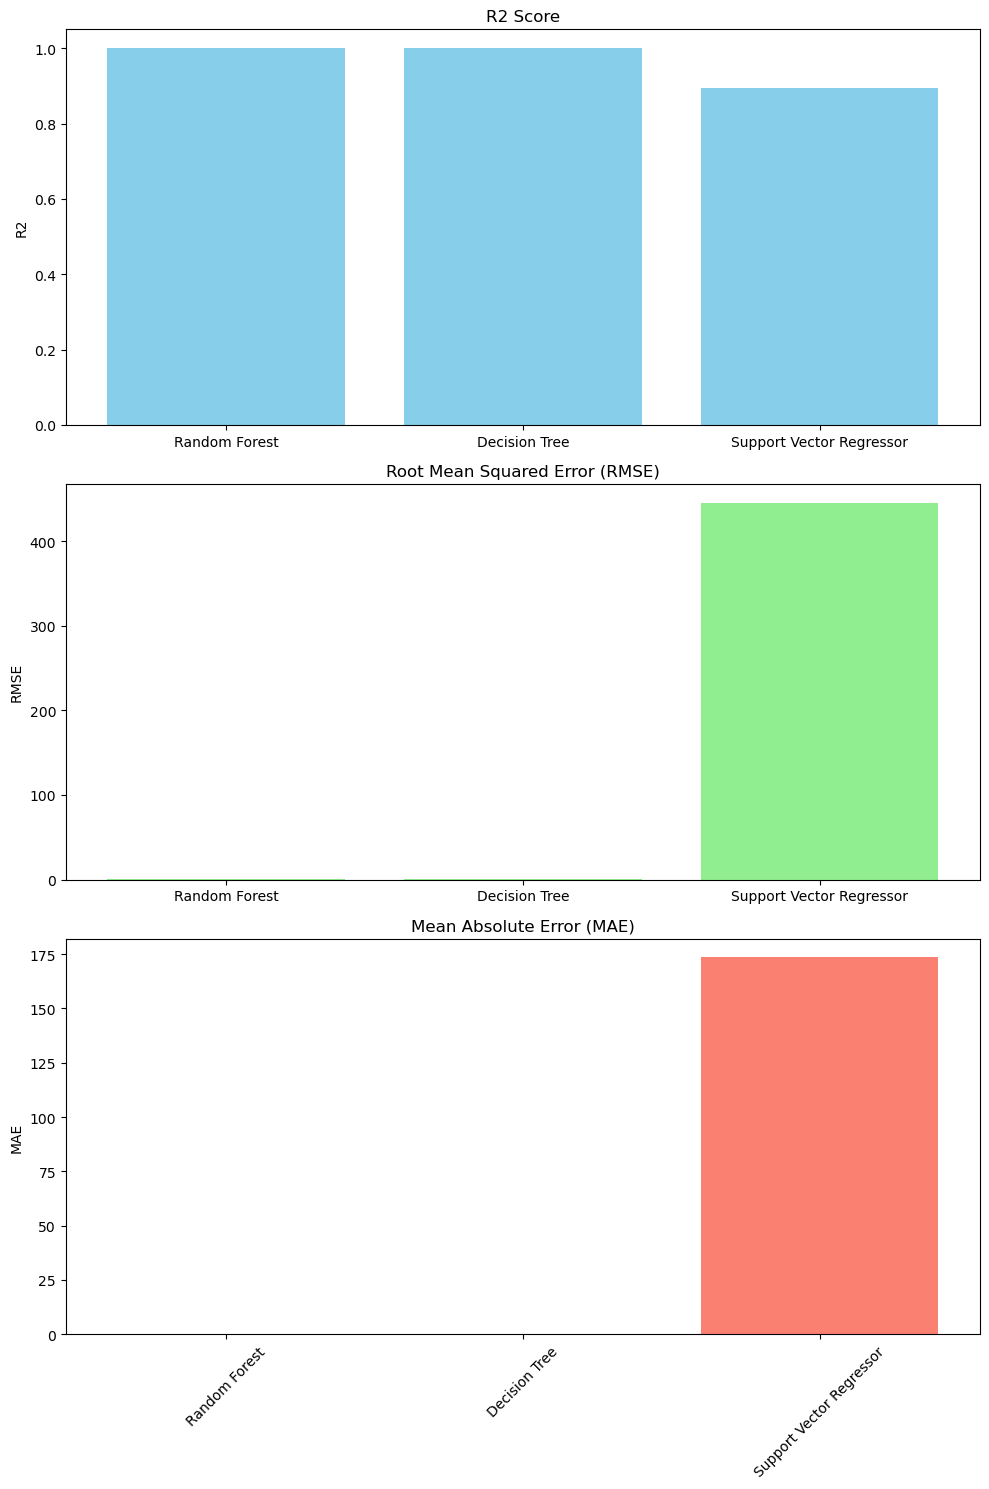

In [20]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# R2 Score
axs[0].bar(results["Model"], results["R2"], color='skyblue')
axs[0].set_title('R2 Score')
axs[0].set_ylabel('R2')

# RMSE
axs[1].bar(results["Model"], results["RMSE"], color='lightgreen')
axs[1].set_title('Root Mean Squared Error (RMSE)')
axs[1].set_ylabel('RMSE')

# MAE
axs[2].bar(results["Model"], results["MAE"], color='salmon')
axs[2].set_title('Mean Absolute Error (MAE)')
axs[2].set_ylabel('MAE')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()